In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Pooja\Downloads\customer_churn_dataset.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

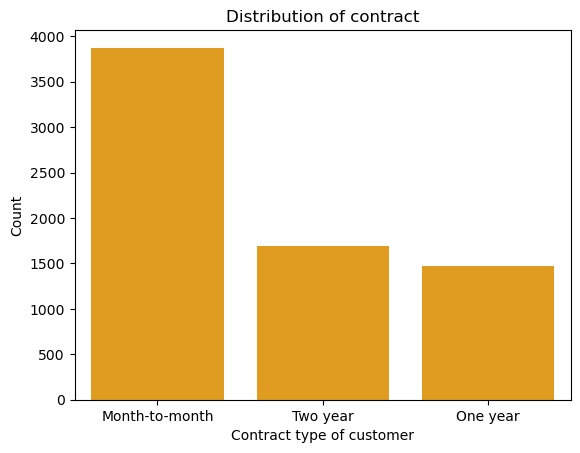

In [4]:
contract_counts = df["Contract"].value_counts()
sns.barplot(x = contract_counts.index, y = contract_counts.values, color = "orange")
plt.xlabel("Contract type of customer")
plt.ylabel("Count")
plt.title("Distribution of contract")
plt.show()

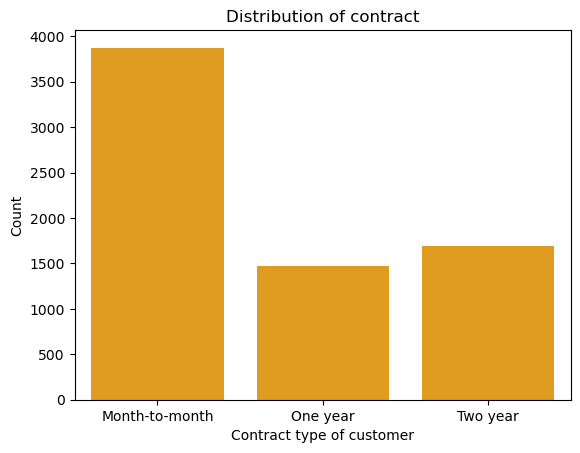

In [5]:
sns.countplot(x = "Contract", data = df, color = "orange")
plt.xlabel("Contract type of customer")
plt.ylabel("Count")
plt.title("Distribution of contract")
plt.show()

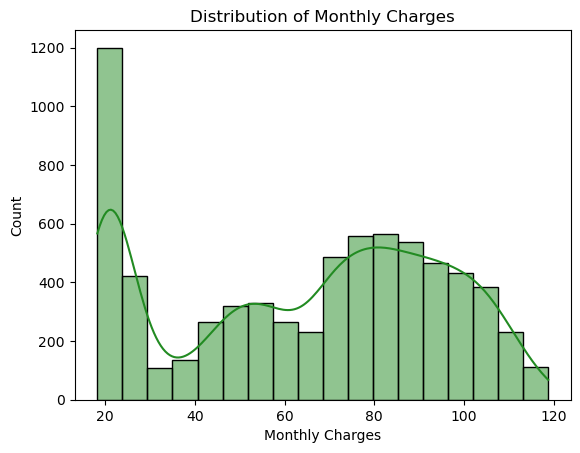

In [6]:
sns.histplot(x = "MonthlyCharges", data = df, kde = True, color = 'forestgreen')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Distribution of Monthly Charges')
plt.show()

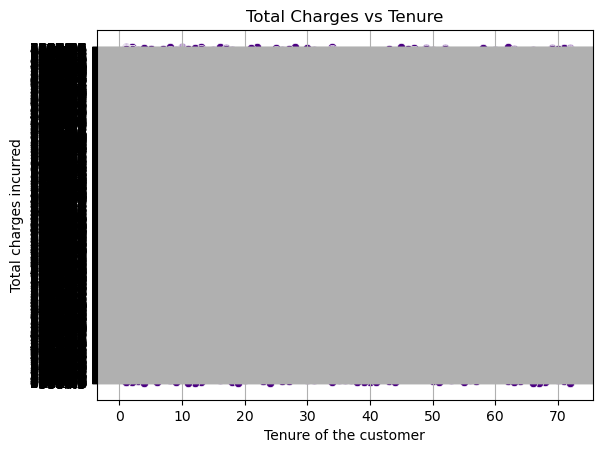

In [7]:
sns.scatterplot(x = 'tenure', y = 'TotalCharges', data = df, color = 'indigo')
plt.xlabel('Tenure of the customer')
plt.ylabel('Total charges incurred')
plt.title('Total Charges vs Tenure')
plt.grid()
plt.show()

In [16]:
print(df['TotalCharges'].dtype)

object


In [20]:
df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df = df.dropna(subset =[ 'TotalCharges']).reset_index(drop = True)

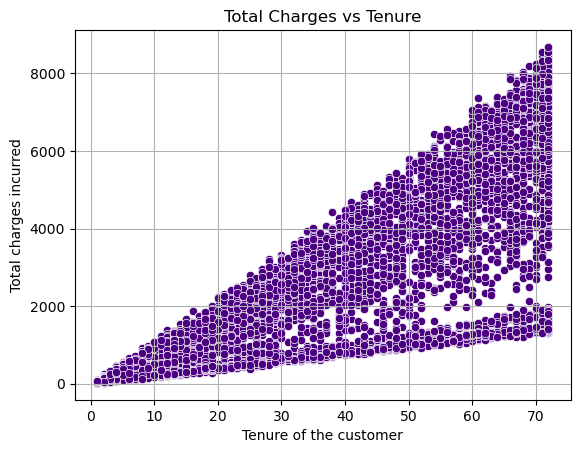

In [22]:
sns.scatterplot(x = 'tenure', y = 'TotalCharges', data = df, color = 'indigo')
plt.xlabel('Tenure of the customer')
plt.ylabel('Total charges incurred')
plt.title('Total Charges vs Tenure')
plt.grid()
plt.show()

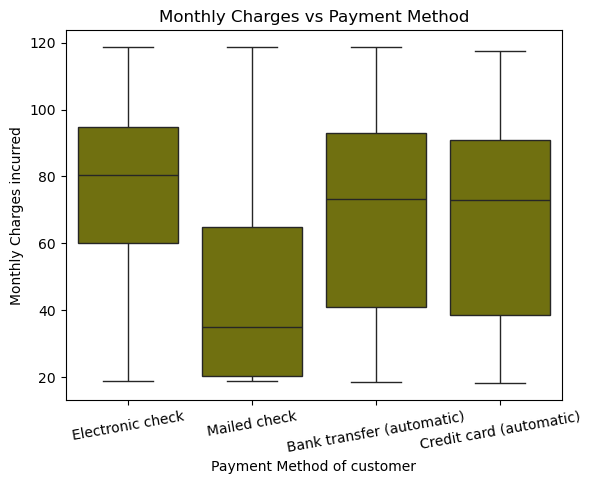

In [38]:
sns.boxplot(x = 'PaymentMethod', y = 'MonthlyCharges', data = df, color = 'olive')
plt.xlabel('Payment Method of customer')
plt.ylabel('Monthly Charges incurred')
plt.title('Monthly Charges vs Payment Method')
plt.xticks(rotation = 10)
plt.show()

### Case Study 2

In [47]:
df1 = pd.read_csv(r"C:\Users\Pooja\Downloads\cars CS 2 DV.csv")
df1.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [49]:
df1.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

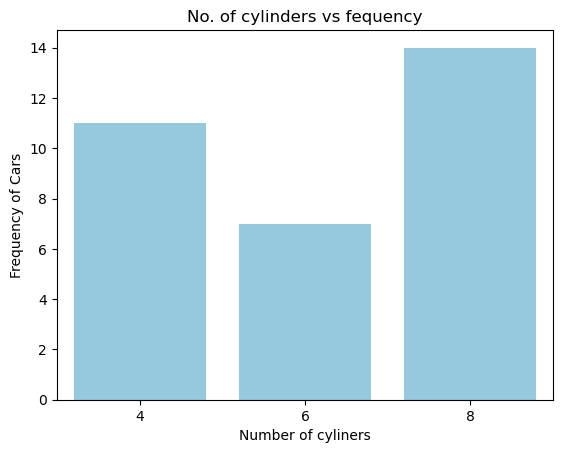

In [62]:
cyl_counts = df1['cyl'].value_counts()

sns.barplot(x = cyl_counts.index, y = cyl_counts.values, color = 'skyblue')
plt.xlabel('Number of cyliners')
plt.ylabel('Frequency of Cars')
plt.title('No. of cylinders vs fequency')
plt.show()

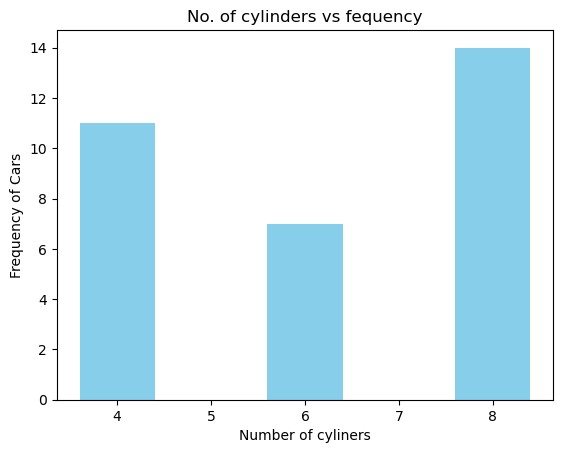

In [66]:
cyl_counts = df1['cyl'].value_counts()

plt.bar(cyl_counts.index, cyl_counts.values, color = 'skyblue')
plt.xlabel('Number of cyliners')
plt.ylabel('Frequency of Cars')
plt.title('No. of cylinders vs fequency')
plt.show()

In [70]:
df1.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

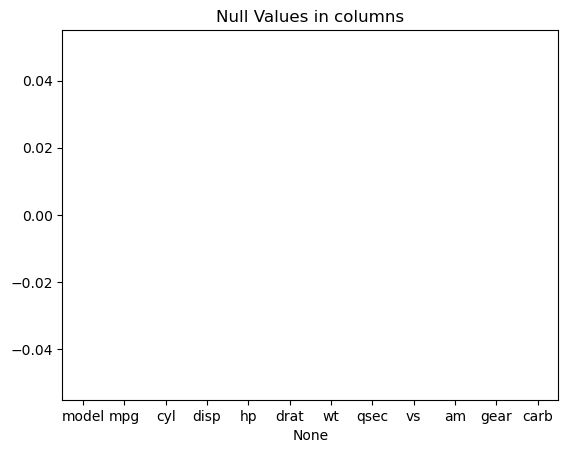

In [78]:
null_counts = df1.isnull().sum()

sns.barplot(x = null_counts.index, y = null_counts.values)
plt.title('Null Values in columns')
plt.show()

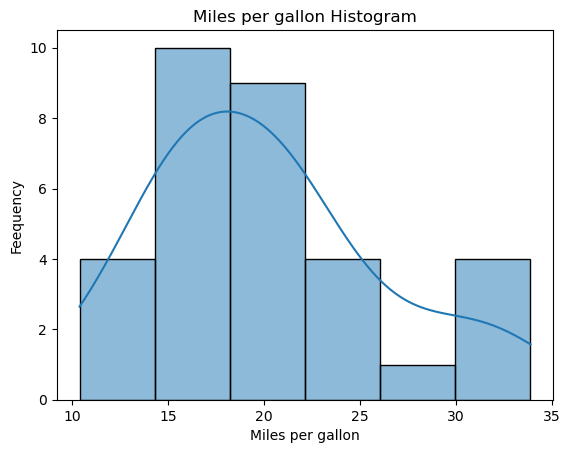

In [80]:
sns.histplot(x = 'mpg', data = df1, kde = True)
plt.xlabel('Miles per gallon')
plt.ylabel('Feequency')
plt.title('Miles per gallon Histogram')
plt.show()

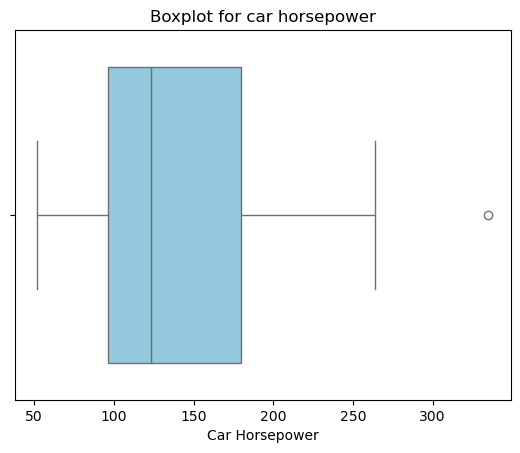

In [82]:
sns.boxplot(x = 'hp', data = df1, color = 'skyblue')
plt.xlabel('Car Horsepower')
plt.title('Boxplot for car horsepower')
plt.show()